![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/retoo"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/retoo


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [3]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [4]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 6.9 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=7cb8d614b78950e281105c2479f063b87e18e66f390092bd60fdab4fb32d0ab1
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [5]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
#'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [6]:
#%%writefile .authinfo
#oda user A00828688tec.mx password Galarza123@

Copy this file to home

In [7]:
!cp .authinfo ~/.authinfo

cp: cannot stat '.authinfo': No such file or directory


**5- Establish Connection (Need to do this step each time you use SASPy)**

In [8]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/retoo/sascfg_personal.py")
sas_session

Using SAS Config named: oda
Error trying to read authinfo file:/root/.authinfo
[Errno 2] No such file or directory: '/root/.authinfo'
Did not find key oda in authinfo file:/root/.authinfo

Please enter the OMR user id: A00828688@tec.mx
Please enter the password for OMR user : ··········
SAS Connection established. Subprocess id is 372



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/retoo/sascfg_personal.py
WORK Path             = /saswork/SAS_workA7A1000056A7_odaws04-usw2.oda.sas.com/SAS_work91E1000056A7_odaws04-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 22183


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [9]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 02:51:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 02:51:00 AM

33         


For local Jupyter

In [10]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [11]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [12]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
307472,2307473.0,MCSWEENEY,CHARLES,0.0,49.0,1600.0,University / College,Suburban,4.0,0.0,...,1.0,2.0,4.0,20.0,10.0,10.0,0.0,0.0,0.0,0.0
225134,2225135.0,MAYHEW,DONALD,0.0,54.0,4200.0,University / College,Downtown,8.0,1.0,...,2.0,1.0,2.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
117727,2117728.0,MEEHAN,LAURA,1.0,81.0,5100.0,High School,Rural,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
27058,2027059.0,ABBOTT,KENNETH,0.0,45.0,4700.0,High School,Suburban,2.0,1.0,...,1.0,1.0,1.0,15.0,15.0,15.0,1.0,25.0,0.0,0.0
207842,2207843.0,WISNIEWSKI,TERRENCE,0.0,22.0,45900.0,University / College,City,8.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


# Exploration

In [13]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [14]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.
data_mergeN = pd.merge(data1, data2, on=["ID"],how="right")



In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = data_mergeN.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
ID,1.000000,-0.002832,-0.000720,-0.000759,0.000815,0.001128,-0.000853,0.000345,-0.001340,-0.000401,-0.001426,-0.000411,-0.001438,-0.000741,0.000066,-0.000845,-0.002595
Woman,-0.002832,1.000000,0.037798,-0.046426,-0.000095,0.001681,-0.000138,-0.002042,-0.000956,-0.002443,0.051112,0.030785,0.050119,-0.000846,0.013658,-0.000691,0.014477
Age,-0.000720,0.037798,1.000000,0.019775,0.000349,0.000411,-0.002079,-0.000671,-0.002581,-0.001805,-0.051445,-0.029519,-0.051216,-0.001535,-0.013239,0.000379,-0.013522
Salary,-0.000759,-0.046426,0.019775,1.000000,-0.000195,0.000421,0.000426,-0.003451,0.001889,-0.001951,0.075216,0.048340,0.074186,0.001101,0.021870,0.001416,0.022055
SeniorList,0.000815,-0.000095,0.000349,-0.000195,1.000000,0.408294,0.385607,0.409977,0.293257,0.662898,0.058632,-0.049351,0.030649,-0.000125,0.001313,-0.001315,-0.001249
NbActivities,0.001128,0.001681,0.000411,0.000421,0.408294,1.000000,0.527538,-0.041532,0.485541,0.337794,0.130007,-0.034664,0.085612,0.172631,0.050613,0.169830,0.048435
Referrals,-0.000853,-0.000138,-0.002079,0.000426,0.385607,0.527538,1.000000,-0.038949,0.450656,0.313620,0.117908,-0.032493,0.076919,0.160814,0.046003,0.159688,0.045224
Recency,0.000345,-0.002042,-0.000671,-0.003451,0.409977,-0.041532,-0.038949,1.000000,-0.265405,0.566351,-0.072300,0.019381,-0.048954,-0.085739,-0.020735,-0.087135,-0.023791
Frequency,-0.001340,-0.000956,-0.002581,0.001889,0.293257,0.485541,0.450656,-0.265405,1.000000,0.512804,0.244038,-0.099925,0.150242,0.165779,0.043278,0.165005,0.041651
Seniority,-0.000401,-0.002443,-0.001805,-0.001951,0.662898,0.337794,0.313620,0.566351,0.512804,1.000000,0.117074,-0.068460,0.069522,0.036973,0.011420,0.034573,0.006719


In [16]:
data_mergeN.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


In [17]:
data_mergeN.isnull().sum()/len(data_mergeN)

ID              0.000000
LastName        0.000023
FirstName       0.000004
Woman           0.000000
Age             0.000000
Salary          0.000000
Education       0.000000
City            0.000000
SeniorList      0.000000
NbActivities    0.000000
Referrals       0.000000
Recency         0.663666
Frequency       0.663666
Seniority       0.663666
TotalGift       0.663666
MinGift         0.663666
MaxGift         0.663666
GaveLastYear    0.000000
AmtLastYear     0.000000
GaveThisYear    0.000000
AmtThisYear     0.000000
dtype: float64

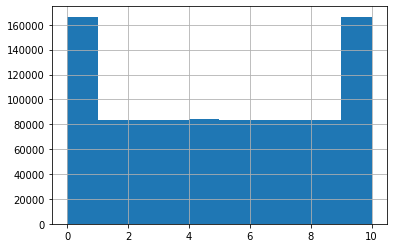

In [18]:
hist = data_mergeN['SeniorList'].hist()

In [4]:
x = data_mergeN['Salary'].values
y = data_mergeN['TotalGift'].values
plt.plot(x,y,'o',markersize=1)


NameError: ignored

In [19]:
import numpy as np

data_mergeN[['Salary']] = data_mergeN[['Salary']].fillna(value=0)  

data_mergeN[['Referrals']] = data_mergeN[['Referrals']].fillna(value=0)  

data_mergeN[['TotalGift']] = data_mergeN[['TotalGift']].fillna(value=0)  

data_mergeN[['MaxGift']] = data_mergeN[['MaxGift']].fillna(value=0)  

data_mergeN[['MinGift']] = data_mergeN[['MinGift']].fillna(value=0)  

data_mergeN[['AmtLastYear']] = data_mergeN[['AmtLastYear']].fillna(value=0)  

data_mergeN[['Recency']] = data_mergeN[['Recency']].fillna(value=100)  


data_mergeN['logSalary']= np.log(data_mergeN['Salary'])
data_mergeN['logReferrals']= np.log(data_mergeN['Referrals'])
data_mergeN['logTotalGift']= np.log(data_mergeN['TotalGift'])
data_mergeN['logMaxGift']= np.log(data_mergeN['MaxGift'])
data_mergeN['logMinGift']= np.log(data_mergeN['MinGift'])
data_mergeN['logAmtLastYear']= np.log(data_mergeN['AmtLastYear'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
data_mergeN_sorted = data_mergeN.sort_values('GaveThisYear',ascending=False)
data_mergeN_sorted.head(10)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,logSalary,logReferrals,logTotalGift,logMaxGift,logMinGift,logAmtLastYear
500000,2500001.0,GARCIA,LAUREN,1.0,25.0,25100.0,University / College,Suburban,5.0,2.0,...,0.0,0.0,1.0,10.0,10.130623,1.098612,6.309918,6.309918,6.309918,-inf
785920,2785921.0,FORD,ETHEL,1.0,80.0,68800.0,High School,City,3.0,0.0,...,0.0,0.0,1.0,10.0,11.138959,-inf,-inf,-inf,-inf,-inf
785984,2785985.0,CYRIER,SARA,1.0,72.0,34600.0,High School,City,3.0,2.0,...,1.0,10.0,1.0,20.0,10.451609,0.000000,2.995732,2.995732,2.995732,2.302585
785983,2785984.0,RITCHEY,DENNIS,0.0,29.0,76500.0,University / College,Rural,9.0,5.0,...,0.0,0.0,1.0,30.0,11.245046,0.000000,-inf,-inf,-inf,-inf
243970,2243971.0,WALLING,JOYCE,1.0,56.0,176300.0,University / College,Suburban,10.0,3.0,...,0.0,0.0,1.0,300.0,12.079942,1.098612,3.806662,3.218876,2.995732,-inf
785981,2785982.0,GARAY,JAMES,0.0,30.0,9400.0,University / College,City,0.0,0.0,...,1.0,70.0,1.0,10.0,9.148465,-inf,-inf,-inf,-inf,4.248495
243973,2243974.0,CAPELLO,MISSY,1.0,49.0,67600.0,University / College,City,10.0,0.0,...,0.0,0.0,1.0,20.0,11.121363,0.000000,-inf,-inf,-inf,-inf
243978,2243979.0,TALLERICO,LAURETTA,1.0,22.0,50100.0,University / College,Downtown,9.0,0.0,...,0.0,0.0,1.0,20.0,10.821776,-inf,3.401197,3.401197,3.401197,-inf
785975,2785976.0,SHAFFER,BRUCE,0.0,36.0,193000.0,University / College,Rural,10.0,0.0,...,0.0,0.0,1.0,20.0,12.170445,-inf,3.912023,3.912023,3.912023,-inf
243984,2243985.0,OLCOTT,PATRICK,0.0,62.0,68000.0,High School,City,10.0,1.0,...,1.0,20.0,1.0,20.0,11.127263,0.000000,4.976734,4.317488,2.302585,2.995732


In [21]:
data_mergeN_sorted.loc[data_mergeN_sorted['logSalary'] < 1, 'logSalary'] = 0
data_mergeN_sorted.loc[data_mergeN_sorted['logReferrals'] < 1, 'logReferrals'] = 0
data_mergeN_sorted.loc[data_mergeN_sorted['logTotalGift'] < 1, 'logTotalGift'] = 0
data_mergeN_sorted.loc[data_mergeN_sorted['logTotalGift'] < 1, 'logTotalGift'] = 0
data_mergeN_sorted.loc[data_mergeN_sorted['logMaxGift'] < 1, 'logMaxGift'] = 0
data_mergeN_sorted.loc[data_mergeN_sorted['logMinGift'] < 1, 'logMinGift'] = 0
data_mergeN_sorted.loc[data_mergeN_sorted['logAmtLastYear'] < 1, 'logAmtLastYear'] = 0
data_mergeN_sorted

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,logSalary,logReferrals,logTotalGift,logMaxGift,logMinGift,logAmtLastYear
500000,2500001.0,GARCIA,LAUREN,1.0,25.0,25100.0,University / College,Suburban,5.0,2.0,...,0.0,0.0,1.0,10.0,10.130623,1.098612,6.309918,6.309918,6.309918,0.000000
785920,2785921.0,FORD,ETHEL,1.0,80.0,68800.0,High School,City,3.0,0.0,...,0.0,0.0,1.0,10.0,11.138959,0.000000,0.000000,0.000000,0.000000,0.000000
785984,2785985.0,CYRIER,SARA,1.0,72.0,34600.0,High School,City,3.0,2.0,...,1.0,10.0,1.0,20.0,10.451609,0.000000,2.995732,2.995732,2.995732,2.302585
785983,2785984.0,RITCHEY,DENNIS,0.0,29.0,76500.0,University / College,Rural,9.0,5.0,...,0.0,0.0,1.0,30.0,11.245046,0.000000,0.000000,0.000000,0.000000,0.000000
243970,2243971.0,WALLING,JOYCE,1.0,56.0,176300.0,University / College,Suburban,10.0,3.0,...,0.0,0.0,1.0,300.0,12.079942,1.098612,3.806662,3.218876,2.995732,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355252,2355253.0,TAYLOR,CHRISTOPHER,0.0,23.0,7600.0,University / College,City,0.0,0.0,...,0.0,0.0,0.0,0.0,8.935904,0.000000,0.000000,0.000000,0.000000,0.000000
355253,2355254.0,JOHNSON,BRYAN,0.0,54.0,50300.0,High School,Suburban,6.0,2.0,...,0.0,0.0,0.0,0.0,10.825760,0.000000,2.995732,2.995732,2.995732,0.000000
355254,2355255.0,STEWART,MATTHEW,0.0,64.0,5500.0,High School,Downtown,9.0,2.0,...,0.0,0.0,0.0,0.0,8.612503,1.098612,4.382027,3.912023,3.401197,0.000000
355255,2355256.0,WITTLIFF,JONATHAN,0.0,55.0,162000.0,University / College,Suburban,9.0,0.0,...,0.0,0.0,0.0,0.0,11.995352,0.000000,0.000000,0.000000,0.000000,0.000000


## Data Partition

In [43]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_mergeN_sorted, test_size=0.4, random_state=44444) 
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,logSalary,logReferrals,logTotalGift,logMaxGift,logMinGift,logAmtLastYear
456713,2456714.0,JIMENEZ,MARCY,1.0,24.0,48400.0,University / College,City,0.0,0.0,...,1.0,25.0,0.0,0.0,10.787255,0.0,0.0,0.0,0.0,3.218876
693411,2693412.0,BATES,ADAM,0.0,67.0,50300.0,University / College,City,9.0,0.0,...,0.0,0.0,0.0,0.0,10.825760,0.0,0.0,0.0,0.0,0.000000


In [44]:
X_train = train[['logTotalGift', 'logSalary','logAmtLastYear','Age','logReferrals','logMinGift','logMaxGift','Woman','Recency']]  
Y_train = train['AmtThisYear']
X_valid = validation[['logTotalGift', 'logSalary','logAmtLastYear','Age','logReferrals','logMinGift','logMaxGift','Woman','Recency']] 
Y_valid = validation['AmtThisYear']

In [45]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_valid = scaler.transform(X_valid)

## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [25]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [26]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.169909125007994
6016.48176730557
77.56598331295473


# PCA

[texto del vínculo](https://)## **Regression Tree Model**

In [27]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [28]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.175943937100387
6325.129400571553
79.53068213319658


In [46]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror').fit(X_train, Y_train)
XGB_predict = xgb_model.predict(X_valid)


In [47]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,XGB_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,XGB_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,XGB_predict)))

13.1744026494582
6249.03403585767
79.05083197448127


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## Scoring New Data

### Prepare data for scoring

In [48]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [49]:

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

import numpy as np
scoring_data = pd.merge(data1, data2, on=["ID"],how="right")

scoring_data[['Salary']] = scoring_data[['Salary']].fillna(value=0)  

scoring_data[['Referrals']] = scoring_data[['Referrals']].fillna(value=0)  

scoring_data[['TotalGift']] = scoring_data[['TotalGift']].fillna(value=0)  

scoring_data[['MaxGift']] = scoring_data[['MaxGift']].fillna(value=0)  

scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0)  

scoring_data[['AmtLastYear']] = scoring_data[['AmtLastYear']].fillna(value=0)  

scoring_data[['Recency']] = scoring_data[['Recency']].fillna(value=100)  


scoring_data['logSalary']= np.log(scoring_data['Salary'])+1
scoring_data['logReferrals']= np.log(scoring_data['Referrals'])+1
scoring_data['logTotalGift']= np.log(scoring_data['TotalGift'])+1
scoring_data['logMaxGift']= np.log(scoring_data['MaxGift'])+1
scoring_data['logMinGift']= np.log(scoring_data['MinGift'])+1
scoring_data['logAmtLastYear']= np.log(scoring_data['AmtLastYear'])+1

scoring_data = scoring_data.sort_values('GaveThisYear',ascending=False)
scoring_data.head(10)

scoring_data.loc[scoring_data['logSalary'] < 1, 'logSalary'] = 0
scoring_data.loc[scoring_data['logReferrals'] < 1, 'logReferrals'] = 0
scoring_data.loc[scoring_data['logTotalGift'] < 1, 'logTotalGift'] = 0
scoring_data.loc[scoring_data['logTotalGift'] < 1, 'logTotalGift'] = 0
scoring_data.loc[scoring_data['logMaxGift'] < 1, 'logMaxGift'] = 0
scoring_data.loc[scoring_data['logMinGift'] < 1, 'logMinGift'] = 0
scoring_data.loc[scoring_data['logAmtLastYear'] < 1, 'logAmtLastYear'] = 0
scoring_data

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,logSalary,logReferrals,logTotalGift,logMaxGift,logMinGift,logAmtLastYear
500000,2500001.0,GARCIA,LAUREN,1.0,25.0,25100.0,University / College,Suburban,5.0,2.0,...,0.0,0.0,1.0,10.0,11.130623,2.098612,7.309918,7.309918,7.309918,0.000000
785920,2785921.0,FORD,ETHEL,1.0,80.0,68800.0,High School,City,3.0,0.0,...,0.0,0.0,1.0,10.0,12.138959,0.000000,0.000000,0.000000,0.000000,0.000000
785984,2785985.0,CYRIER,SARA,1.0,72.0,34600.0,High School,City,3.0,2.0,...,1.0,10.0,1.0,20.0,11.451609,1.000000,3.995732,3.995732,3.995732,3.302585
785983,2785984.0,RITCHEY,DENNIS,0.0,29.0,76500.0,University / College,Rural,9.0,5.0,...,0.0,0.0,1.0,30.0,12.245046,1.000000,0.000000,0.000000,0.000000,0.000000
243970,2243971.0,WALLING,JOYCE,1.0,56.0,176300.0,University / College,Suburban,10.0,3.0,...,0.0,0.0,1.0,300.0,13.079942,2.098612,4.806662,4.218876,3.995732,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355252,2355253.0,TAYLOR,CHRISTOPHER,0.0,23.0,7600.0,University / College,City,0.0,0.0,...,0.0,0.0,0.0,0.0,9.935904,0.000000,0.000000,0.000000,0.000000,0.000000
355253,2355254.0,JOHNSON,BRYAN,0.0,54.0,50300.0,High School,Suburban,6.0,2.0,...,0.0,0.0,0.0,0.0,11.825760,1.000000,3.995732,3.995732,3.995732,0.000000
355254,2355255.0,STEWART,MATTHEW,0.0,64.0,5500.0,High School,Downtown,9.0,2.0,...,0.0,0.0,0.0,0.0,9.612503,2.098612,5.382027,4.912023,4.401197,0.000000
355255,2355256.0,WITTLIFF,JONATHAN,0.0,55.0,162000.0,University / College,Suburban,9.0,0.0,...,0.0,0.0,0.0,0.0,12.995352,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['logTotalGift', 'logSalary','logAmtLastYear','Age','logReferrals','logMinGift','logMaxGift','Woman','Recency']]
regr_predict_end=xgb_model.predict(X)



scoring_data['Prediction'] = regr_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.sample(10)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,AmtLastYear,GaveThisYear,AmtThisYear,logSalary,logReferrals,logTotalGift,logMaxGift,logMinGift,logAmtLastYear,Prediction
417506,2417507.0,PAYNE,LISA,1.0,58.0,20700.0,High School,City,7.0,0.0,...,0.0,0.0,0.0,10.937889,1.0,0.000000,0.000000,0.000000,0.0,12.604526
956584,2956585.0,DARDEN,JERRY,0.0,53.0,157300.0,University / College,Suburban,4.0,0.0,...,0.0,0.0,0.0,12.965910,0.0,0.000000,0.000000,0.000000,0.0,5.655955
85871,2085872.0,MILLER,STEPHEN,0.0,83.0,35000.0,High School,City,3.0,1.0,...,0.0,0.0,0.0,11.463103,0.0,0.000000,0.000000,0.000000,0.0,4.793585
469803,2469804.0,SOLOMON,ORVILLE,0.0,25.0,69900.0,University / College,Suburban,8.0,0.0,...,0.0,0.0,0.0,12.154821,0.0,0.000000,0.000000,0.000000,0.0,7.067880
726531,2726532.0,JOHNSTON,STEPHANIE,1.0,27.0,44900.0,University / College,City,0.0,0.0,...,0.0,0.0,0.0,11.712193,0.0,0.000000,0.000000,0.000000,0.0,11.617550
497931,2497932.0,RAYBURN,BARBARA,1.0,40.0,56800.0,University / College,Downtown,4.0,2.0,...,0.0,0.0,0.0,11.947292,1.0,4.218876,4.218876,4.218876,0.0,27.543419
997440,2997441.0,KAZMIERCZAK,IVAN,0.0,18.0,66300.0,University / College,City,4.0,2.0,...,0.0,0.0,0.0,12.101945,0.0,4.806662,4.218876,3.995732,0.0,14.650614
248313,2248314.0,ROSS,BRADLEY,0.0,52.0,193200.0,University / College,Rural,10.0,0.0,...,0.0,0.0,0.0,13.171481,0.0,3.995732,3.995732,3.995732,0.0,7.331022
154403,2154404.0,DOMINGOS,RUTH,1.0,21.0,19900.0,High School,Downtown,0.0,0.0,...,0.0,1.0,25.0,10.898475,0.0,0.000000,0.000000,0.000000,0.0,8.013634
678402,2678403.0,CLARK,JANET,1.0,73.0,10700.0,University / College,Suburban,3.0,0.0,...,0.0,0.0,0.0,10.277999,0.0,0.000000,0.000000,0.000000,0.0,3.648259


## Exporting Results to a CSV File

In [51]:
Result= scoring_data[['ID','Prediction']]
Result.to_csv('Predictions.csv', index=False)

In [52]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 60000
submission = Result.head(NB)
submission["ID"].astype(int).to_csv('Results_R1.csv', index=False)

In [53]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [54]:
!head Round1\ Output.csv

ID,Prediction
2078521.0,78.80022846678261
2283940.0,78.3427067579426
2649852.0,78.21200362570215
2137770.0,76.36742639406559
2793751.0,75.6865047006394
2078339.0,75.18898919427511
2526615.0,73.7112243367624
2490735.0,73.5278181497005
2468736.0,72.5376422109123
